### This notebook is meant for the most general and also flexible analysis
- Quickly load data and look at it
- All cameras possible
- All models possible
- Can be used to save wavelength calibration

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import copy
import json
import codecs
import logging
logging.basicConfig(level=logging.CRITICAL, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger("divertor_spectroscopy")
logger.setLevel(logging.DEBUG)

from divertor_spectroscopy import utilities as utils
from divertor_spectroscopy import datasource_qss
from divertor_spectroscopy import spectrum
from divertor_spectroscopy import wavelength_calibration
#from divertor_spectroscopy import QSS_search
from divertor_spectroscopy import analysis
from divertor_spectroscopy import instrument


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### The following cell is for input

2024-11-07 13:24:51,228 - divertor_spectroscopy.datasource_qss - INFO - Start reading data


http://archive-webapi.ipp-hgw.mpg.de/Test/raw/W7X/QSS_DivertorSpectroscopy/PI_CCD_06_1-QSS60OC095_DATASTREAM/0/Images


2024-11-07 13:25:06,127 - divertor_spectroscopy.datasource_qss - INFO - Finish reading data
2024-11-07 13:25:06,128 - divertor_spectroscopy.datasource_qss - INFO - Start unsigned integer correction
2024-11-07 13:25:06,293 - divertor_spectroscopy.datasource_qss - INFO - Finish unsigned integer correction
2024-11-07 13:25:06,432 - divertor_spectroscopy.datasource_qss - INFO - Shape of data[signal_counts]: (521, 27, 1024)
2024-11-07 13:25:06,433 - divertor_spectroscopy.datasource_qss - INFO - Shape of offset_spectrum: (27, 1024)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.p

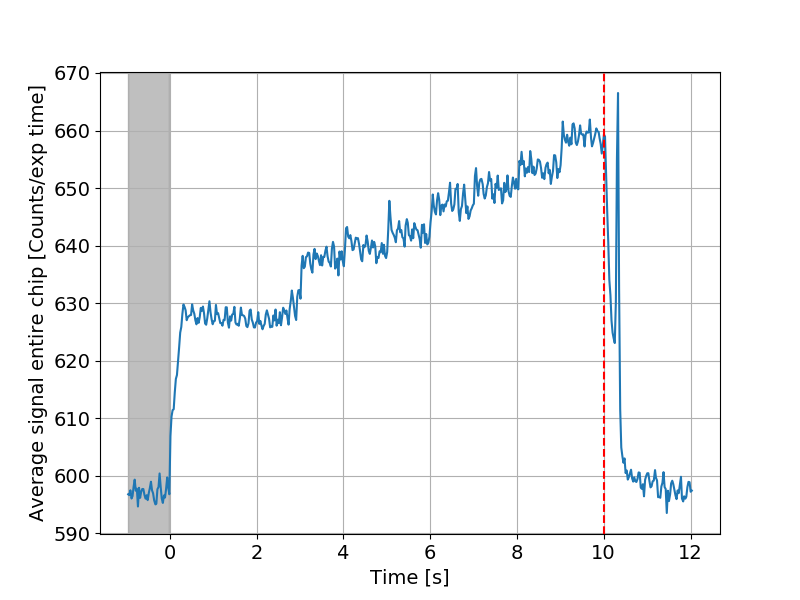

2024-11-07 13:25:07,249 - divertor_spectroscopy.datasource_qss - INFO - 378 nm is the central wavelength
2024-11-07 13:25:07,250 - divertor_spectroscopy.datasource_qss - INFO - grating number 0 is used: it has 1800 lines/mm
2024-11-07 13:25:07,251 - divertor_spectroscopy.datasource_qss - INFO - slit width nan is used
2024-11-07 13:25:07,253 - divertor_spectroscopy.datasource_qss - INFO - filter number 0 is used
2024-11-07 13:25:07,254 - divertor_spectroscopy.datasource_qss - INFO - EM gain 10 is used
2024-11-07 13:25:07,255 - divertor_spectroscopy.datasource_qss - INFO - Binning seems to be in the natural order: y_0 binning: 881, y_0 software binning 915
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  

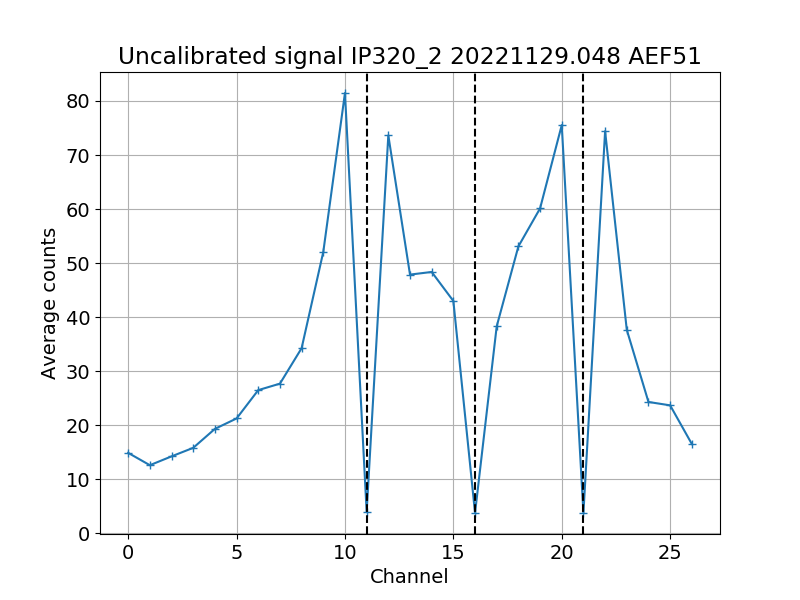

2024-11-07 13:25:07,796 - divertor_spectroscopy.datasource_qss - DEBUG - The wavelength calibration with the following comment is used: OP2.1_convolution_entire_spectrum
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


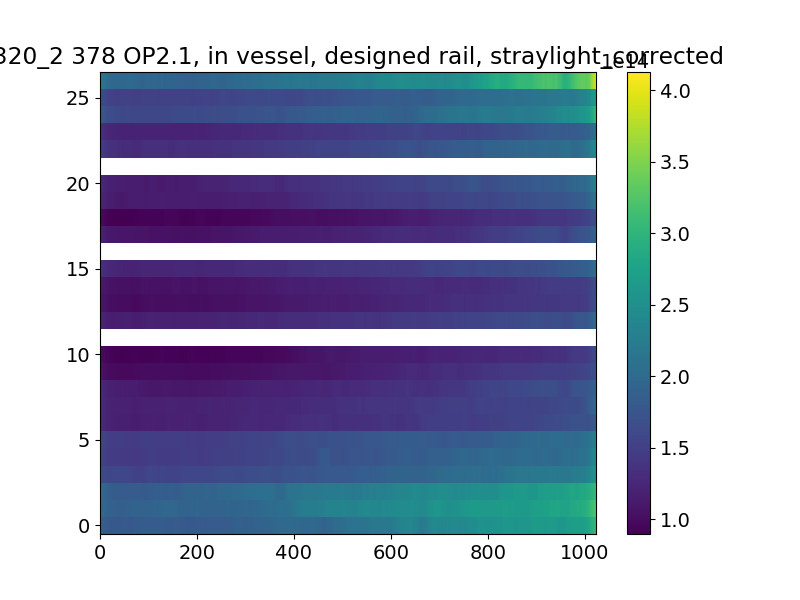

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\datasource_qss.py:312: RuntimeWarning: Mean of empty slice
  self.data["signal_photons"], (0, 2)), "+-")


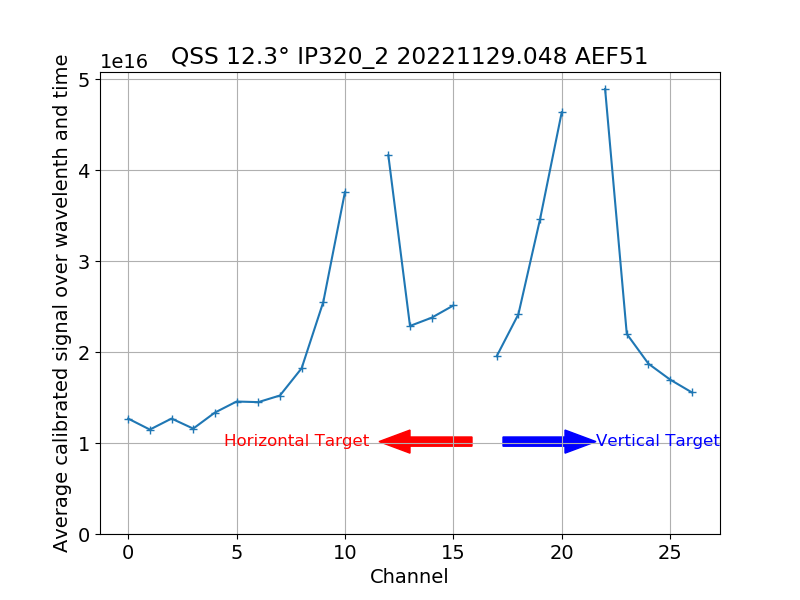

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\wavelength_calibration.py:71: RuntimeWarning: Mean of empty slice
  ds_qss.data[signal_type], (0, 2)))
\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\wavelength_calibration.py:81: RuntimeWarning: Mean of empty slice
  calibration_spectrum = np.nanmean(spectrum_saturated_frames_excluded,0)
2024-11-07 13:25:10,902 - divertor_spectroscopy.analysis - DEBUG - guess [0, 15.556671042971807, 15.66997090537972, 14.888926245984162, 15.681658419453818, 15.592224194234069, 16.657845090537656, 16.190140370095428, 16.79523226002072, 16.533973491684435, 15.714941147349771, 15.467723818219678, 16.8879919500851, 17.2583806319459]
2024-11-07 13:25:10,903 - divertor_spectroscopy.analysis - DEBUG - lower_bounds: [-0.2, 13.67403875729203, 13.67403875729203, 13.67403875729203, 13.67403875729203, 13.67403875729203, 13.67403875729203, 13.67403875729203, 13.67

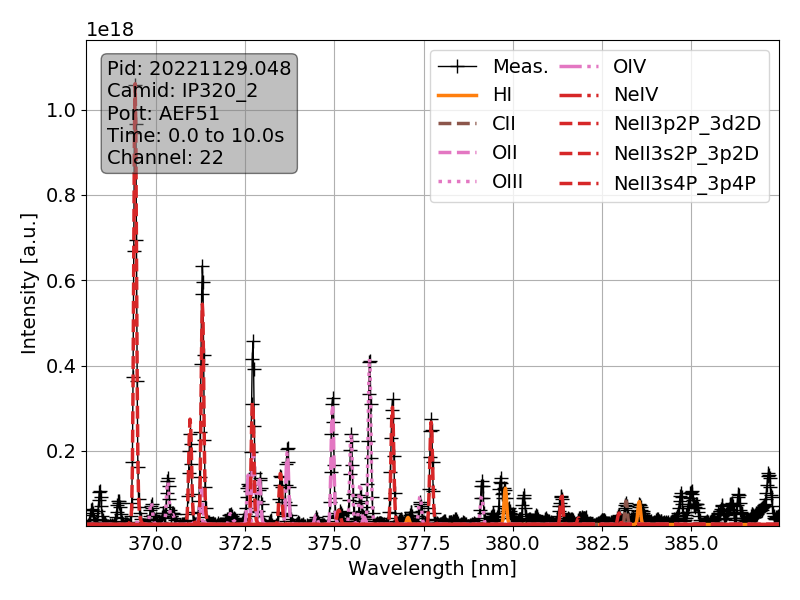

2024-11-07 13:25:22,586 - divertor_spectroscopy.wavelength_calibration - INFO - Wavelength is corrected using channel 22, result -0.0001347451771261561 
2024-11-07 13:25:22,707 - divertor_spectroscopy.datasource_qss - INFO - Start reading data


http://archive-webapi.ipp-hgw.mpg.de/Test/raw/W7X/QSS_DivertorSpectroscopy/PI_CCD_06_1-QSS60OC095_DATASTREAM/0/Images


2024-11-07 13:25:43,930 - divertor_spectroscopy.datasource_qss - INFO - Finish reading data
2024-11-07 13:25:43,932 - divertor_spectroscopy.datasource_qss - INFO - Start unsigned integer correction
2024-11-07 13:25:44,138 - divertor_spectroscopy.datasource_qss - INFO - Finish unsigned integer correction
2024-11-07 13:25:44,339 - divertor_spectroscopy.datasource_qss - INFO - Shape of data[signal_counts]: (721, 27, 1024)
2024-11-07 13:25:44,340 - divertor_spectroscopy.datasource_qss - INFO - Shape of offset_spectrum: (27, 1024)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.p

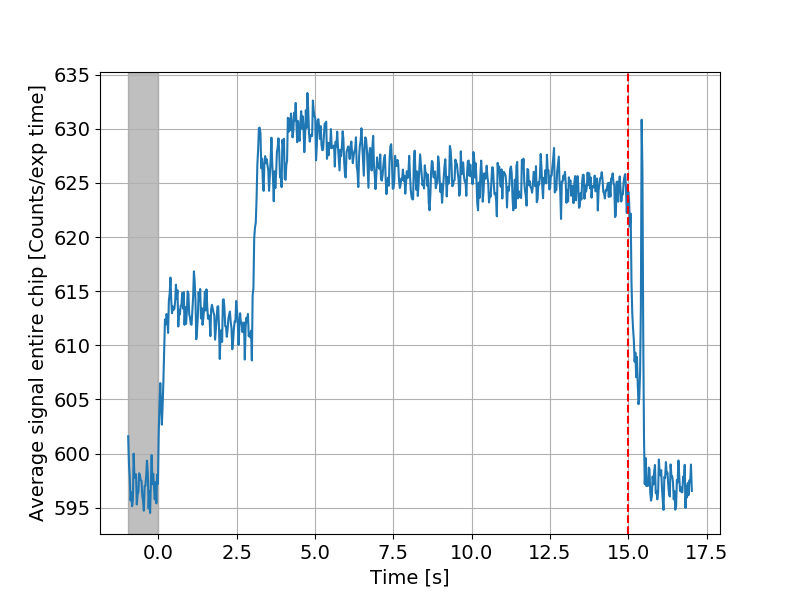

2024-11-07 13:25:45,202 - divertor_spectroscopy.datasource_qss - INFO - 364 nm is the central wavelength
2024-11-07 13:25:45,203 - divertor_spectroscopy.datasource_qss - INFO - grating number 0 is used: it has 1800 lines/mm
2024-11-07 13:25:45,205 - divertor_spectroscopy.datasource_qss - INFO - slit width nan is used
2024-11-07 13:25:45,206 - divertor_spectroscopy.datasource_qss - INFO - filter number 0 is used
2024-11-07 13:25:45,207 - divertor_spectroscopy.datasource_qss - INFO - EM gain 10 is used
2024-11-07 13:25:45,208 - divertor_spectroscopy.datasource_qss - INFO - Binning seems to be in the natural order: y_0 binning: 881, y_0 software binning 915
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  

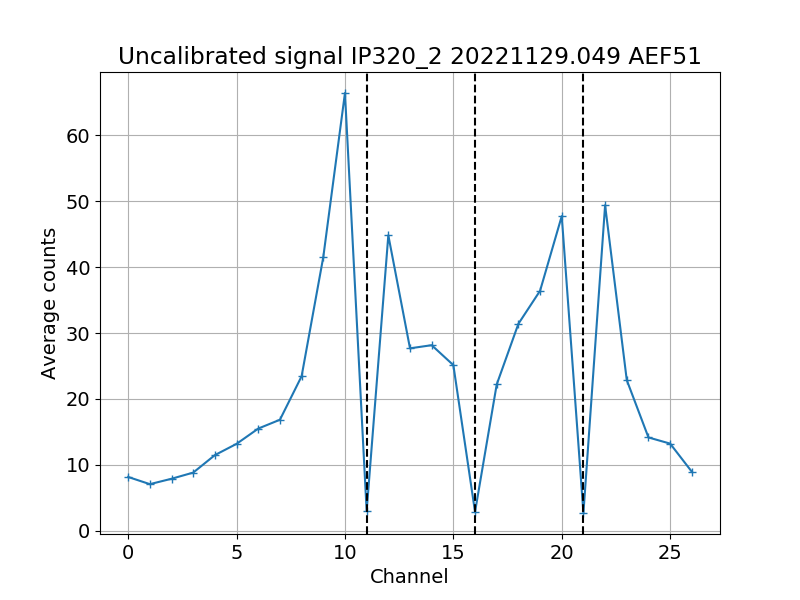

2024-11-07 13:25:45,839 - divertor_spectroscopy.datasource_qss - DEBUG - The wavelength calibration with the following comment is used: OP2.1_convolution_entire_spectrum
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


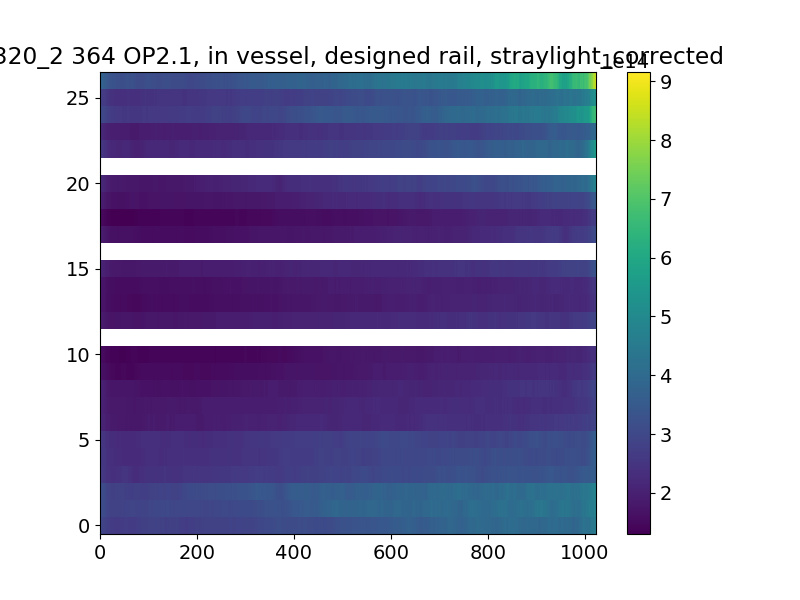

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\datasource_qss.py:312: RuntimeWarning: Mean of empty slice
  self.data["signal_photons"], (0, 2)), "+-")


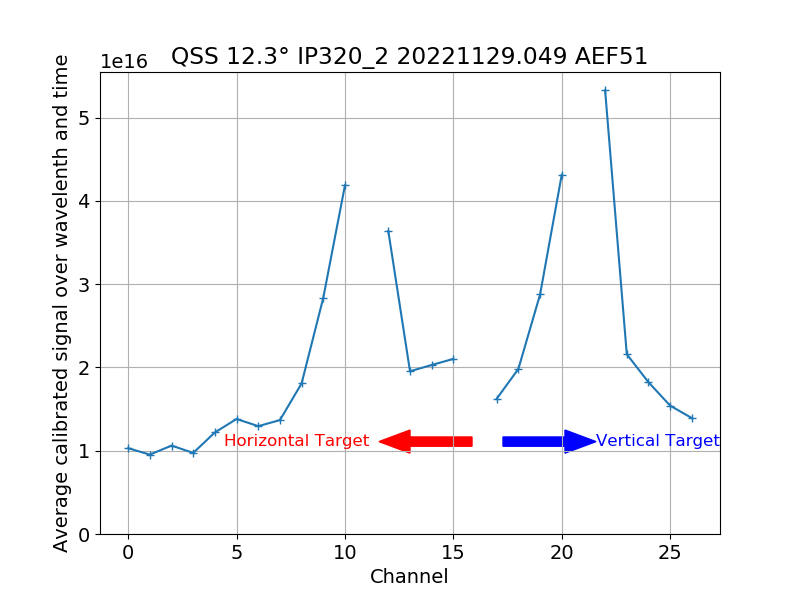

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\wavelength_calibration.py:71: RuntimeWarning: Mean of empty slice
  ds_qss.data[signal_type], (0, 2)))
\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\wavelength_calibration.py:81: RuntimeWarning: Mean of empty slice
  calibration_spectrum = np.nanmean(spectrum_saturated_frames_excluded,0)
\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\analysis.py:89: RuntimeWarning: invalid value encountered in log10
  intensity_guess = np.log10((experiment_data[position_idx] - self.background_guess)/summed_branching_ratios[dominant_idx] *self.instrument.width * np.sqrt(2 * np.pi))
2024-11-07 13:25:49,758 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:25:49,761 - divertor_spectroscopy.analysis - DEBUG - guess [0, 15.35018247841221, 16.04595105059482, 16.1736006607

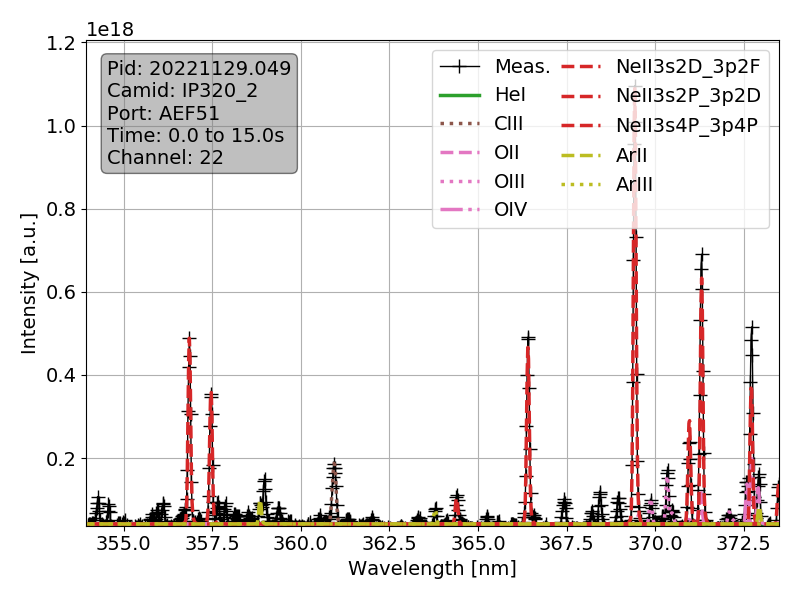

2024-11-07 13:25:58,764 - divertor_spectroscopy.wavelength_calibration - INFO - Wavelength is corrected using channel 22, result -0.00028186214121378054 
2024-11-07 13:25:58,924 - divertor_spectroscopy.datasource_qss - INFO - AEF51 channels have been repaired during campaign
2024-11-07 13:25:58,951 - divertor_spectroscopy.datasource_qss - INFO - Start reading data


http://archive-webapi.ipp-hgw.mpg.de/ArchiveDB/raw/W7X/QSS_DivertorSpectroscopy/PI_CCD_05_1-QSS60OC093_DATASTREAM/0/Images


2024-11-07 13:26:19,273 - divertor_spectroscopy.datasource_qss - INFO - Finish reading data
2024-11-07 13:26:19,275 - divertor_spectroscopy.datasource_qss - INFO - Start unsigned integer correction
2024-11-07 13:26:19,554 - divertor_spectroscopy.datasource_qss - INFO - Finish unsigned integer correction
2024-11-07 13:26:19,839 - divertor_spectroscopy.datasource_qss - INFO - Shape of data[signal_counts]: (694, 27, 1024)
2024-11-07 13:26:19,841 - divertor_spectroscopy.datasource_qss - INFO - Shape of offset_spectrum: (27, 1024)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.p

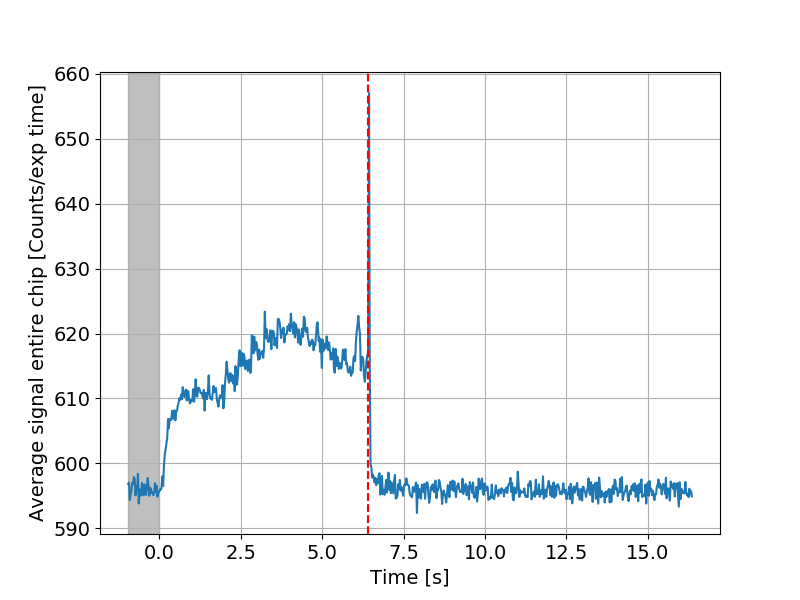

2024-11-07 13:26:24,012 - divertor_spectroscopy.datasource_qss - INFO - 364 nm is the central wavelength
2024-11-07 13:26:24,013 - divertor_spectroscopy.datasource_qss - INFO - grating number 1 is used: it has 1800 lines/mm
2024-11-07 13:26:24,014 - divertor_spectroscopy.datasource_qss - INFO - slit width 30 is used
2024-11-07 13:26:24,015 - divertor_spectroscopy.datasource_qss - INFO - filter number 0 is used
2024-11-07 13:26:24,016 - divertor_spectroscopy.datasource_qss - INFO - EM gain 1 is used
2024-11-07 13:26:24,017 - divertor_spectroscopy.datasource_qss - INFO - Binning seems to be in the natural order: y_0 binning: 1, y_0 software binning -5
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super

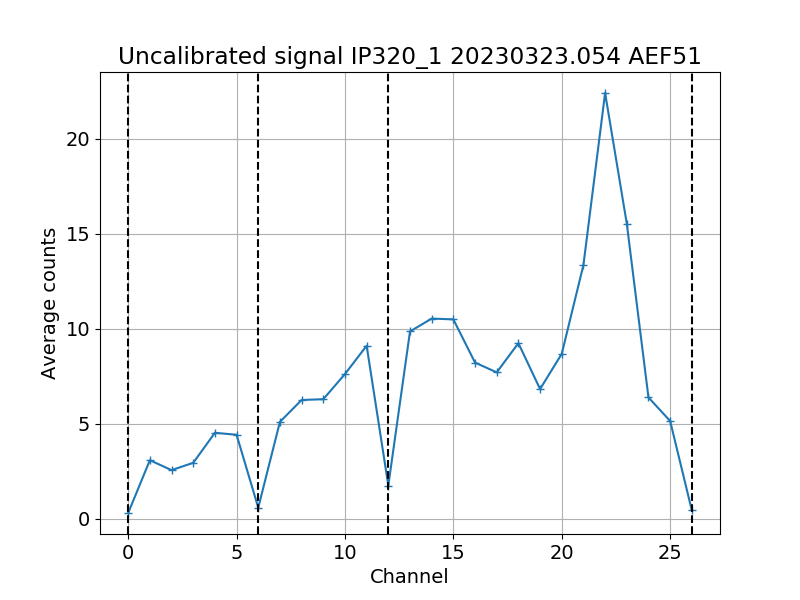

2024-11-07 13:26:26,007 - divertor_spectroscopy.datasource_qss - DEBUG - The wavelength calibration with the following comment is used: OP2.1_convolution_entire_spectrum
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


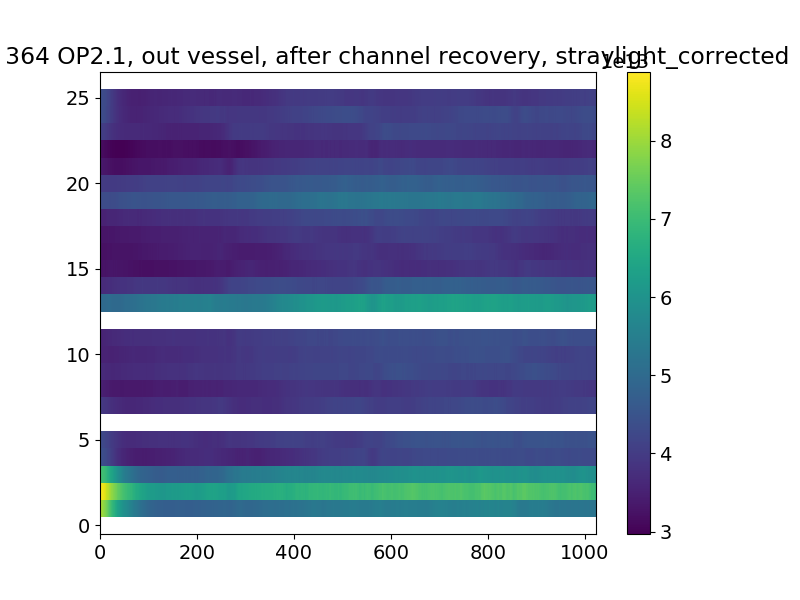

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\datasource_qss.py:312: RuntimeWarning: Mean of empty slice
  self.data["signal_photons"], (0, 2)), "+-")


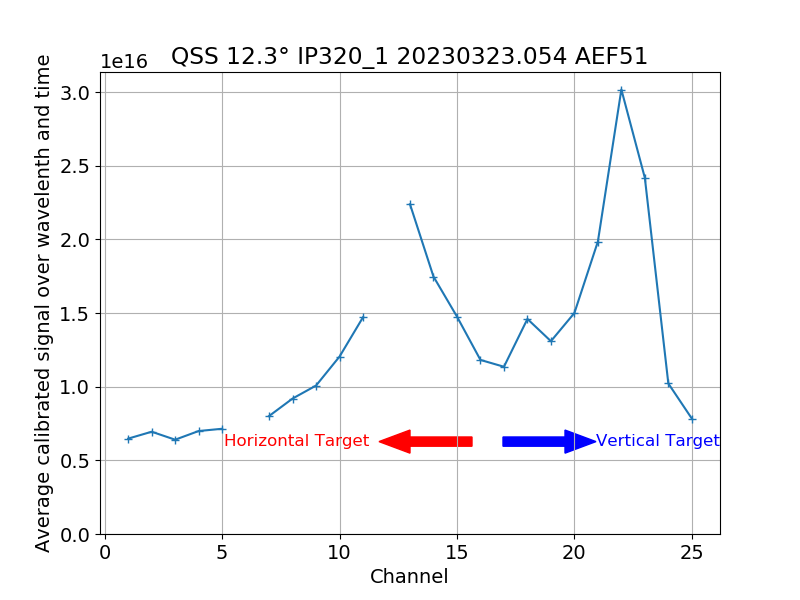

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\wavelength_calibration.py:71: RuntimeWarning: Mean of empty slice
  ds_qss.data[signal_type], (0, 2)))
\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\wavelength_calibration.py:81: RuntimeWarning: Mean of empty slice
  calibration_spectrum = np.nanmean(spectrum_saturated_frames_excluded,0)
2024-11-07 13:26:33,293 - divertor_spectroscopy.analysis - DEBUG - guess [0, 15.419379702622102, 15.663800994417208, 16.68474714127304, 16.07990573408912, 16.784767059249162, 16.56630438217378, 17.07899424521976, 17.648068726566954, 16.62516849542194, 15.717978211173351, 16.82238696788158, 16.38673515357574]
2024-11-07 13:26:33,294 - divertor_spectroscopy.analysis - DEBUG - lower_bounds: [-0.2, 13.88304942835148, 13.88304942835148, 13.88304942835148, 13.88304942835148, 13.88304942835148, 13.88304942835148, 13.88304942835148, 13.88304942835148, 13.8830

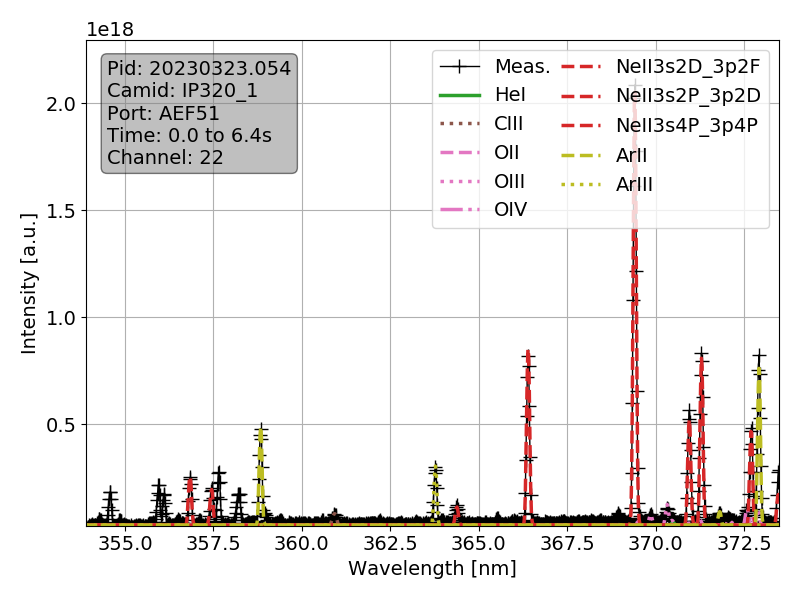

2024-11-07 13:26:51,746 - divertor_spectroscopy.wavelength_calibration - INFO - Wavelength is corrected using channel 22, result 2.157684843759001e-05 


In [6]:
%matplotlib widget
# spectrometer and discharge
campaign = "OP2.1"
camid = {"20221129.048":"IP320_2","20221129.049":"IP320_2","20230323.054":"IP320_1"}
pids = ["20221129.048","20221129.049","20230323.054"]
ds_qss = {}
model = {}
debug = True
ground_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/qss_analysis/"
for pid in pids:
    save_path = ground_path+"discharges/"+campaign+"/"+pid[:8]+"/"+pid+"/"
    try:
        with open(save_path+"settings_200_version1.json") as f:
            settings_load = json.load(f)
        experiment_length = settings_load["discharge_length"]
        config = settings_load["config"]
    except:
        print("Couldn't read the setup file")
        experiment_length = 15
        config = "???"


    # datasource
    instrument_function_mode = "convolution_entire_spectrum"
    #instrument_function_mode = "gauss"
    wcal = True # will use the already existing calibration
    wcal_extra = "wavelength_calibration"
    wcal_extra = ""
    #if camid[:3] == "IP160":
    #    wcal_extra = "he_lines"
    #extra = "high_n_balmer_lines"
    extra = "reduced_NII_lines"
    wcal_extra = ""
    #extra = "reduced"
    #extra = "pec_lines_nitrogen"
    #extra = ""
    #if wcal_extra != "":
    #    wcal_comment = campaign+"_"+wcal_extra+"_"+instrument_function_mode # will find correct wl calibration automatically
    #else:
    mustache_correction = False
    #wcal_comment = None
    ical = True
    instrument_cal = True #

    ical_comment = None # will load ical automatically
    central_wavelength = None # rarely the automatic saving of this parameter failed, then you need to go manually or Sopra
    #central_wavelength = 410.1
    database_path = None # handled automatically
    broken_channels = None # handled automatically
    #broken_channels = [2,8,10,14,16,21,24] # you need this shit, if for example in OP1.2b channels are given away to the filterscope
    straylight_correction_channels = None#[16]
    #straylight_correction_channels = [26]

    zeeman= True # use zeeman effect - will slow the code down
    stark_density = False
    nitrogen_seeding = False
    special_tags_model = True # this is relevant if you want to debug pec_lines
    exclude_pixels_enabled = False
    exclude_pixels = None
    exclude_saturation_in_wl_calibration = True
    exclude_wavelength_from_fit = None
    save_wavelength_calibration = False
    fit_coefficients=False # fits your first and second wl calibration as these should not change over the chip
    software_binning = True

    # here you 
    analysis_start = 0
    analysis_end = experiment_length
    analysis_step = 0.2 # 

    save_fits = True
    fontsize =14
    show_positions = False
    scale = "log"
    xlim = None
    software_binning_shift = None
    # datasource
    if instrument_function_mode == "gauss":
        numeric_instrument_function = False
    else:
        numeric_instrument_function = True
    wcal_comment = campaign+"_"+instrument_function_mode
    if ical:
        signal_type = "signal_photons"
    else:
        signal_type = "signal_counts"
    if signal_type == "signal_counts":
        intensity_label = "Intensity [Counts]"
    else:
        intensity_label=r"Intensity [Photons/($\mathrm{m}^2$ nm sr s)]"
    if camid[pid] == "IP160_1":
        port = "AEF30"
    if camid[pid] == "IP160_2":
        port = "AEI30"
    if camid[pid] == "IP320_2" or camid[pid] == "IP320_1":
        port = "AEF51"
    if camid[pid] == "IP320_3" or camid[pid] == "IP320_4" or camid[pid] == "IP160_4":
        port = "AEI51"
    if camid[pid] == "SopraWega":
        pass
    if config[0] == "E":
        strikelines = ["horizontal","vertical"]
    if config[0] == "K":
        strikelines = ["vertical"]
    if config[0] == "D":
        strikelines = ["horizontal"]
    exclude_channels = {}
    exclude_channels["horizontal"] = np.arange(16,27)
    exclude_channels["vertical"] = np.arange(0,16)
    ls = {"horizontal":"-","vertical":"--"}
    #%matplotlib widget
    ds_qss[pid] = datasource_qss.Datasource_qss(database_path=database_path,time_id=pid,camid=camid[pid],broken_channels=broken_channels,straylight_correction_channels=straylight_correction_channels,
                                        experiment_length=experiment_length,port=port,wcal=wcal,wcal_comment=wcal_comment,ical=ical,ical_comment=ical_comment,exclude_pixels=exclude_pixels,
                                        instrument_cal=instrument_cal,numeric_instrument_function=numeric_instrument_function,central_wavelength=central_wavelength,campaign=campaign,
                                        software_binning=software_binning,software_binning_shift=software_binning_shift,debug=debug)
    #ds_qss.experiment_length = experiment_length
    importlib.reload(spectrum)
    if camid[pid][:5] == "IP320":
        kwargs = {"extra": wcal_extra,"zeeman":zeeman,"stark_density":stark_density,"special_tags":special_tags_model}
    if camid[pid][:5] == "IP160":
        kwargs = {"zeeman":zeeman,"special_tags":special_tags_model}
    if camid[pid][:5] == "Sopra":
        kwargs = {"zeeman":zeeman,"special_tags":special_tags_model,"stark_density":stark_density}
    #wcal_extra = "_wavelength_calibration"zeeman=zeeman,stark_density=stark_density,extra=extra,special_tags=special_tags_model
    model[pid] = spectrum.load_model(camid=camid[pid],central_wavelength=ds_qss[pid].central_wavelength,**kwargs)
    strongest_line = model[pid].strongest_line
    importlib.reload(wavelength_calibration)
    wavelength_calibration.calibrate_spectrometer_using_datasource_qss_class(
                    instrument_function_mode=instrument_function_mode,ds_qss=ds_qss[pid],model=model[pid],
                    wavelength_coefficients_guess=ds_qss[pid].wavelength_coefficients_guess,
                    lower_bounds_wl=ds_qss[pid].lower_bounds_wl,upper_bounds_wl=ds_qss[pid].upper_bounds_wl,
                    mustache_correction=mustache_correction,wcal=wcal,signal_type=signal_type,
                    save_wavelength_calibration=save_wavelength_calibration,comment=wcal_comment,
                    fit_coefficients=fit_coefficients,intensity_label=intensity_label,
                    exclude_saturation_in_wl_calibration=exclude_saturation_in_wl_calibration,save_path=save_path+"Plots/",
                    debug=debug)

### Plot data of the two discharges over each other

{'20221129.048': <divertor_spectroscopy.spectrum_models.ip320_cw_378.Ip320_cw_378 object at 0x000001AD07CC8E48>, '20221129.049': <divertor_spectroscopy.spectrum_models.ip320_cw_364.Ip320_cw_364 object at 0x000001AD2D707388>, '20230323.054': <divertor_spectroscopy.spectrum_models.ip320_cw_364.Ip320_cw_364 object at 0x000001AD0155BC88>}
161
161
119


c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


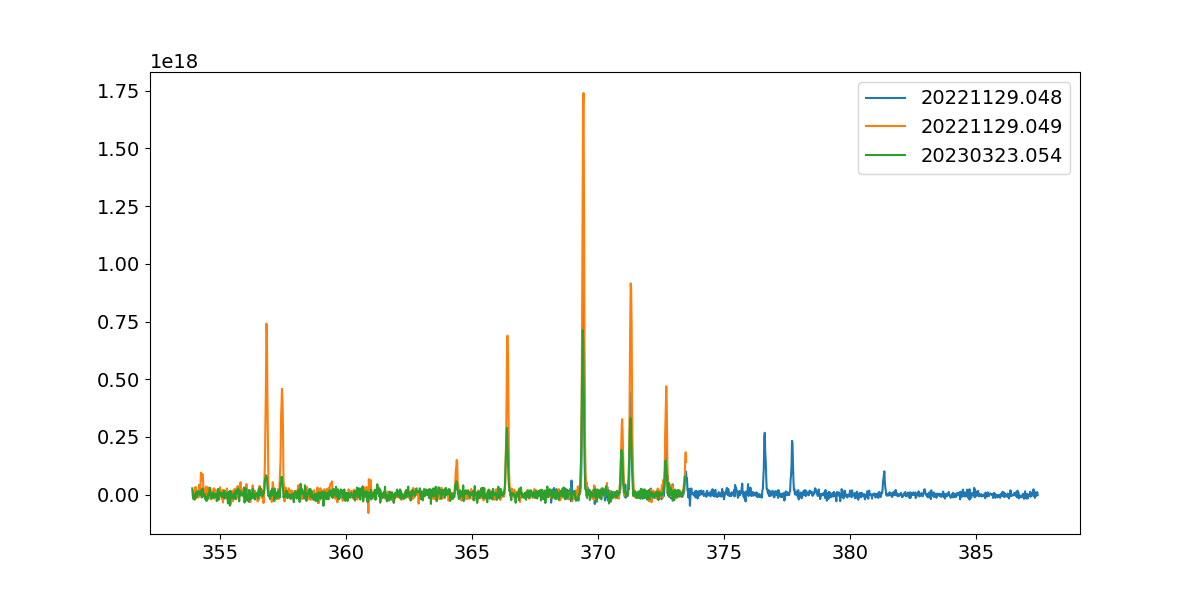

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\analysis.py:89: RuntimeWarning: invalid value encountered in log10
  intensity_guess = np.log10((experiment_data[position_idx] - self.background_guess)/summed_branching_ratios[dominant_idx] *self.instrument.width * np.sqrt(2 * np.pi))
2024-11-07 13:27:04,534 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:27:04,537 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:27:04,539 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:27:04,543 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:27:04,637 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missi

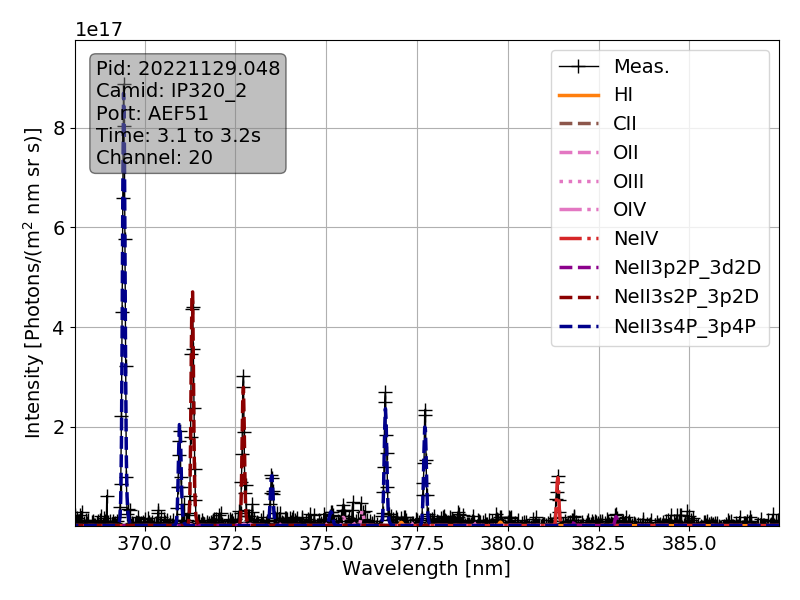

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\analysis.py:89: RuntimeWarning: invalid value encountered in log10
  intensity_guess = np.log10((experiment_data[position_idx] - self.background_guess)/summed_branching_ratios[dominant_idx] *self.instrument.width * np.sqrt(2 * np.pi))
2024-11-07 13:27:33,235 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:27:33,241 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: De

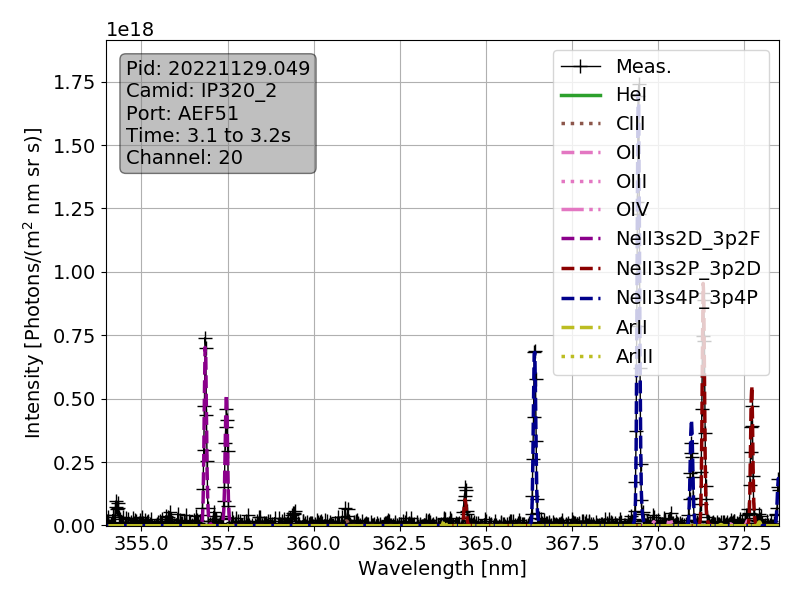

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\analysis.py:89: RuntimeWarning: invalid value encountered in log10
  intensity_guess = np.log10((experiment_data[position_idx] - self.background_guess)/summed_branching_ratios[dominant_idx] *self.instrument.width * np.sqrt(2 * np.pi))
2024-11-07 13:27:46,110 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:27:46,113 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:27:46,120 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
2024-11-07 13:27:46,122 - divertor_spectroscopy.analysis - DEBUG - Intensity guess not finite
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error wil

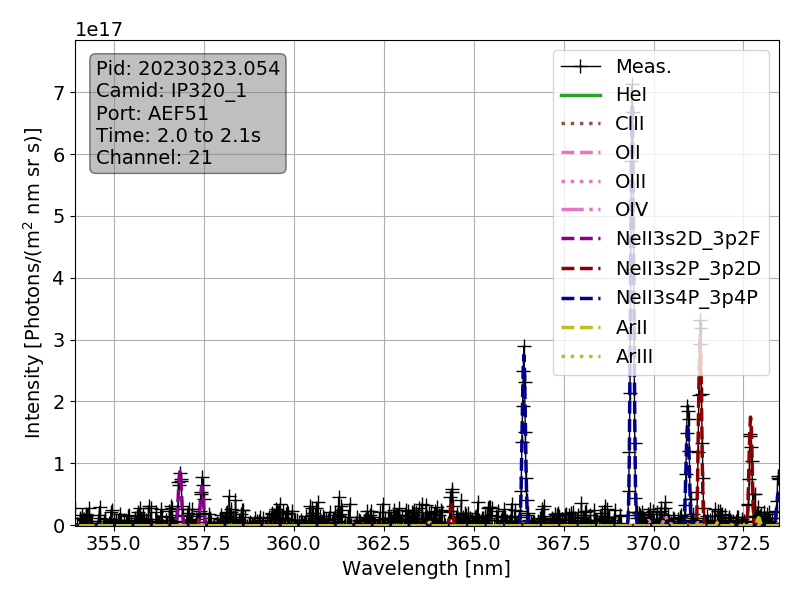

In [7]:
time = {"20221129.048":3.05,"20221129.049":3.05,"20230323.054":2.0}
t_idx = {}
c_idx = {"20221129.048":20,"20221129.049":20,"20230323.054":21}
print(model)
experiment_data = {}
plt.figure(figsize=(12,6))
for pid in pids:
    t_idx[pid] = utils.val2idx(ds_qss[pid].data["time_s"],time[pid])
    print(t_idx[pid])
    experiment_data[pid] = np.nanmean(ds_qss[pid].data["signal_photons"][t_idx[pid]:t_idx[pid]+4,c_idx[pid]],axis=0)-np.nanmean(ds_qss[pid].data["signal_photons"][t_idx[pid]-5:t_idx[pid]-1,c_idx[pid]],axis=0)
    plt.plot(ds_qss[pid].data["wavelength_nm"][c_idx[pid]],experiment_data[pid],label=pid)
plt.legend()
plt.show()
for pid in pids:
    wavelength = ds_qss[pid].data["wavelength_nm"][c_idx[pid]]
    width = ds_qss[pid].instrument_function[c_idx[pid]]*(np.abs(wavelength[0]-wavelength[-1])/len(wavelength))
    inst = instrument.Instrument(wavelength=wavelength,width=width,instrument_function_mode=instrument_function_mode,numeric_instrument_function=ds_qss[pid].numeric_instrument_function[c_idx[pid]])
    analyse = analysis.Analysis(model=model[pid],instrument=inst)
    analyse.fit_spectrum(experiment_data=experiment_data[pid])
    highlight_tags = model[pid].all_tags
    show_fit = False
    background_guess = False
    show_guess = False
    ylim = None
    ylabel = None
    title = None
    legend_loc = "upper right"
    ncol = 1
    title_box = "Pid: {}\nCamid: {}\nPort: {}\nTime: {:.1f} to {:.1f}s\nChannel: {}".format(pid, camid[pid], 
                                        port, ds_qss[pid].data["time_s"][t_idx[pid]], ds_qss[pid].data["time_s"][t_idx[pid]+4], c_idx[pid])
    title_box_placement = "upper left"
    special_tags = model[pid].ne_tags
    save_path_input = None
    scale = "linear"
    analyse.display_spectrum(highlight_tags=highlight_tags,show_positions=show_positions,fit=show_fit,
                             background_guess=background_guess,guess=show_guess,xlim=xlim,ylim=ylim,ylabel=intensity_label,
                             title=title,legend_loc=legend_loc,ncol=ncol,title_box=title_box,title_box_placement=title_box_placement,
                             scale=scale,special_tags=special_tags,save_path=save_path_input)

    

### Create the normalized spectrum
- use the fit of the red line I guess?

c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


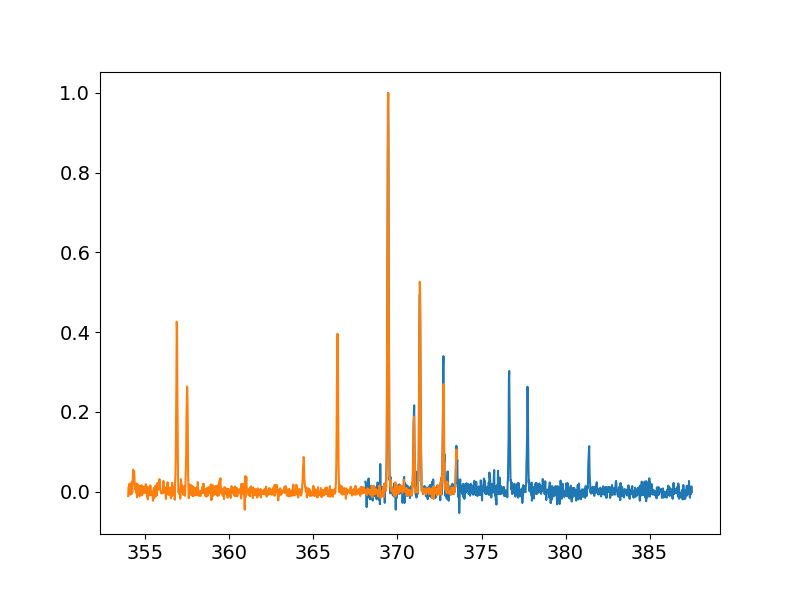

In [15]:
normalized_spectrum = {}
plt.figure(figsize=(8,6))
channel = 12
for pid in pids:
    normalized_spectrum[pid] = experiment_data[pid]/np.max(experiment_data[pid])
    plt.plot(ds_qss[pid].data["wavelength_nm"][channel],normalized_spectrum[pid],label=pid)
plt.show()

### Now actually patch the two spectra together and fit the line branching ratios
- I've done this before, so maybe I have the code for this somewhere

20 20


c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


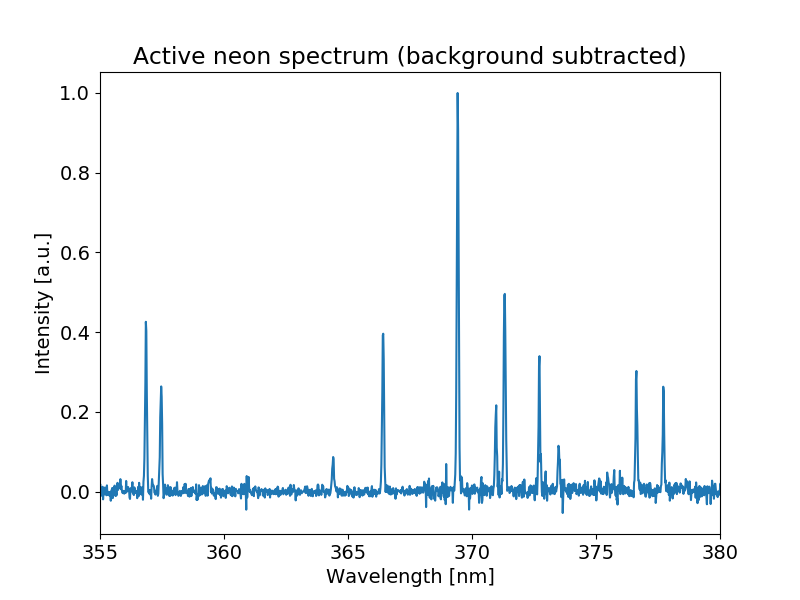

c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


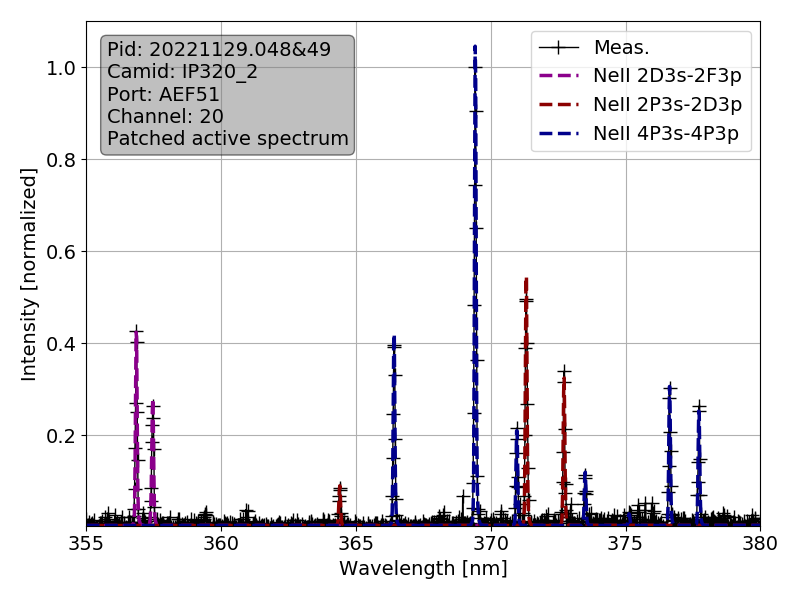

In [77]:
%matplotlib widget
from divertor_spectroscopy.spectrum_models import line_identification
channel = 20
camid = "IP320_2"
pid = "20221129.048"
print(channel, c_idx)
fontsize = 14
plt.rcParams.update({'font.size': fontsize})
wavelength = []
intensity = []
for w_idx,w in enumerate(np.flip(ds_qss["20221129.049"].data["wavelength_nm"][channel])):
    if w < ds_qss["20221129.048"].data["wavelength_nm"][channel][-1]:
        wavelength.append(w)
        intensity.append(np.flip(normalized_spectrum["20221129.049"][-(w_idx+1)]))
for w_idx,w in enumerate(np.flip(ds_qss["20221129.048"].data["wavelength_nm"][channel])):
    wavelength.append(w)
    intensity.append(np.flip(normalized_spectrum["20221129.048"][-(w_idx+1)]))
wavelength = np.flip(wavelength)
intensity = np.flip(intensity)
wavelength = np.array(wavelength)
intensity = np.array(intensity)
xlim = [355,380]
ylim = [0,20]
plt.figure(figsize=(8,6))
plt.plot(wavelength,intensity)
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [a.u.]")
plt.title("Active neon spectrum (background subtracted)")
#plt.ylim(ylim)
plt.xlim(xlim)
plt.show()
importlib.reload(line_identification)
model = line_identification.Line_identification(element="neon",central_wavelength=370,comment="patched_spectrum")
width = ds_qss[pid].instrument_function[c_idx]*(np.abs(wavelength[0]-wavelength[-1])/len(wavelength))
inst = instrument.Instrument(wavelength=wavelength,width=width,instrument_function_mode=instrument_function_mode,numeric_instrument_function=ds_qss[pid].numeric_instrument_function[c_idx])
analyse = analysis.Analysis(model=model,instrument=inst)
analyse.fit_spectrum(experiment_data=intensity)
highlight_tags = model.all_tags
show_fit = False
background_guess = False
show_guess = False
ylim = None
ylabel = None
title = None
legend_loc = "upper right"
ncol = 1
title_box = "Pid: {}&49\nCamid: {}\nPort: {}\nChannel: {}\nPatched active spectrum".format(pid, camid, 
                                    port, c_idx)
title_box_placement = "upper left"
#special_tags = model.ne_tags
special_tags = model.all_tags
save_path_input = None
intensity_label = "Intensity [normalized]"
scale = "linear"
if True:
    #save_path_input = save_path+title+".png"
    title = "patched_neon_spectrum"
    save_path_input = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/"
    save_path_input = save_path_input + title
    title = None
analyse.display_spectrum(highlight_tags=highlight_tags,show_positions=show_positions,fit=show_fit,
                            background_guess=background_guess,guess=show_guess,xlim=xlim,ylim=ylim,ylabel=intensity_label,
                            title=title,legend_loc=legend_loc,ncol=ncol,title_box=title_box,title_box_placement=title_box_placement,
                            scale=scale,special_tags=special_tags,save_path=save_path_input)



In [54]:
analyse.fit_parameters

array([-1.47296251, -2.39649261, -1.69009429, -2.16497436, -1.35493868,
       -1.59105611, -1.47321693, -1.08453032, -1.77484476, -2.0320226 ,
       -2.70390556, -1.63027582, -1.70546565])

In [67]:
import pandas as pd
model.print_line_ratios(popt=analyse.fit_parameters)
print(model.branching_ratios)
#for key in model.branching_ratios.keys():
display(pd.DataFrame(model.branching_ratios))

NeII 2D3s-2F3p
356.850219 0.5794395986718102
357.41826 0.06910000429131015
357.461224 0.35146039703687976
NeII 2P3s-2D3p
364.392908 0.08923713669906773
371.30826 0.5762106770350395
372.71081 0.3345521862658929
NeII 4P3s-4P3p
366.407402 0.1797295334248446
369.421454 0.4398514767402915
370.962218 0.08974114653927728
373.493884 0.04963794305062456
375.124597 0.010566491678070637
376.6259 0.125187382904488
377.713589 0.10528602566240358
{'NeII 2D3s-2F3p': {'356.850219': 0.5794395986718102, '357.41826': 0.06910000429131015, '357.461224': 0.35146039703687976}, 'NeII 2P3s-2D3p': {'364.392908': 0.08923713669906773, '371.30826': 0.5762106770350395, '372.71081': 0.3345521862658929}, 'NeII 4P3s-4P3p': {'366.407402': 0.1797295334248446, '369.421454': 0.4398514767402915, '370.962218': 0.08974114653927728, '373.493884': 0.04963794305062456, '375.124597': 0.010566491678070637, '376.6259': 0.125187382904488, '377.713589': 0.10528602566240358}}


NeII 2D3s-2F3p  NeII 2P3s-2D3p  NeII 4P3s-4P3p
356.850219         0.57944             NaN             NaN
357.41826          0.06910             NaN             NaN
357.461224         0.35146             NaN             NaN
364.392908             NaN        0.089237             NaN
371.30826              NaN        0.576211             NaN
372.71081              NaN        0.334552             NaN
366.407402             NaN             NaN        0.179730
369.421454             NaN             NaN        0.439851
370.962218             NaN             NaN        0.089741
373.493884             NaN             NaN        0.049638
375.124597             NaN             NaN        0.010566
376.6259               NaN             NaN        0.125187
377.713589             NaN             NaN        0.105286

In [72]:
branching_ratios = model.branching_ratios
# Stuart data
stuart = {
    "NeII 2P3s-2D3p": np.array([0.121, 1.0, 0.419]),
    "NeII 4P3s-4P3p": np.array([0.401, 1.00, 0.242, 0.121, 0.040, 0.266, 0.234]),
    "NeII 2D3s-2F3p": np.array([np.nan, np.nan, np.nan])
}

# Updated predicted ratios and wavelengths to ensure correct association
ratios = {
    "NeII 2P3s-2D3p": {
        "wavelength": np.array([364.392908, 371.30826, 372.71081]),
        "predicted": np.array([0.06666666666666667, 0.6, 0.33333333333333326])
    },
    "NeII 4P3s-4P3p": {
        "wavelength": np.array([366.407402, 369.421454, 370.962218, 
                                373.493884, 375.124597, 376.6259, 
                                377.713589]),
        "predicted": np.array([0.15, 0.35, 0.15, 0.04444444444444445, 
                               0.027777777777777776, 0.15, 0.1388888888888889])
    },
    "NeII 2D3s-2F3p": {
        "wavelength": np.array([356.850219, 357.41826, 357.461224]),
        "predicted": np.array([0.5714285714285715, 0.028571428571428567, 0.4])
    }
}

# Integrating experiment data from branching_ratios into ratios
for key, transitions in branching_ratios.items():
    wavelengths = np.array(list(map(float, transitions.keys())))
    intensities = np.array(list(transitions.values()))
    normalized_intensities = intensities / np.sum(intensities)  # Normalize

    # Assign measured values
    ratios[key]["measured"] = normalized_intensities
    ratios[key]["wavelength"] = wavelengths
    ratios[key]["Stuart"] = stuart[key] / np.nansum(stuart[key])  # Normalize Stuart data if possible

    # Sort all arrays by wavelength
    order = np.argsort(ratios[key]["wavelength"])
    ratios[key]["wavelength"] = ratios[key]["wavelength"][order]
    ratios[key]["predicted"] = ratios[key]["predicted"][order]
    ratios[key]["measured"] = ratios[key]["measured"][order]
    ratios[key]["Stuart"] = ratios[key]["Stuart"][order] if not np.isnan(ratios[key]["Stuart"]).all() else np.nan

# Construct tables for each key
table = {}
for key in ratios.keys():
    table[key] = pd.DataFrame(ratios[key])

pd.options.display.precision = 2
pd.set_option('display.precision', 2)
for key in ratios.keys():
    print(key)
    display(table[key])


NeII 2P3s-2D3p


wavelength  predicted  measured  Stuart
0      364.39       0.07      0.09    0.08
1      371.31       0.60      0.58    0.65
2      372.71       0.33      0.33    0.27

NeII 4P3s-4P3p


wavelength  predicted  measured  Stuart
0      366.41       0.15      0.18    0.17
1      369.42       0.35      0.44    0.43
2      370.96       0.15      0.09    0.11
3      373.49       0.04      0.05    0.05
4      375.12       0.03      0.01    0.02
5      376.63       0.15      0.13    0.12
6      377.71       0.14      0.11    0.10

NeII 2D3s-2F3p


wavelength  predicted  measured  Stuart
0      356.85       0.57      0.58     NaN
1      357.42       0.03      0.07     NaN
2      357.46       0.40      0.35     NaN

c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\ipywidgets\widgets\widget.py:478: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


TypeError: 'int' object is not subscriptable

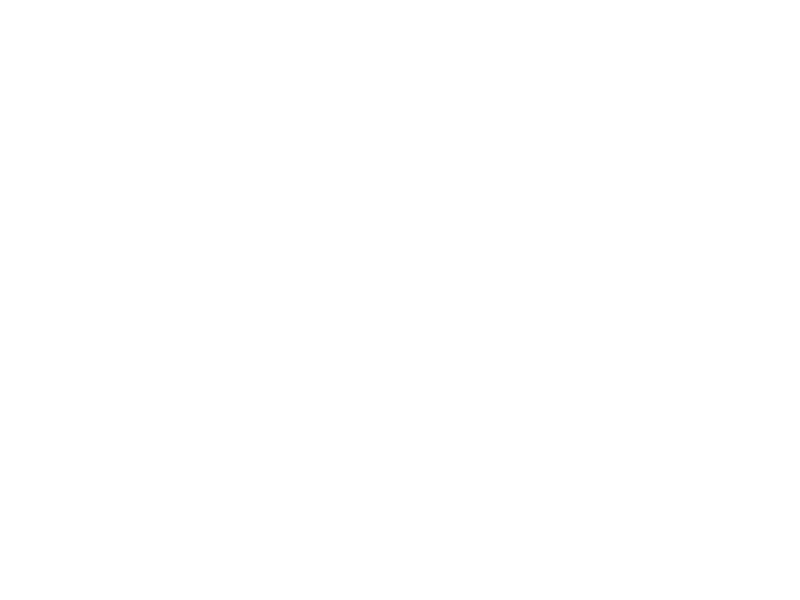

In [11]:
plt.figure(figsize=(8,6))
for pid in pids:
    plt.plot(ds_qss[pid].data["intensity_calibration"][c_idx[pid]],label=pid)
plt.legend()
#plt.yscale("log")
plt.show()

### Sometimes it makes sense to use a different model in the wavelength calibration than in the real analysis
- load the real model
- load a specialized model

In [9]:
if extra != "":
    if extra == "reduced" and ds_qss.central_wavelength == 405:
        from divertor_spectroscopy.spectrum_models import ip320_cw_405_reduced_Balmer_delta
        importlib.reload(ip320_cw_405_reduced_Balmer_delta)
        zeeman = zeeman
        stark_density = True
        debug = True
        model = ip320_cw_405_reduced_Balmer_delta.Ip320_cw_405_reduced_Balmer_delta(zeeman=zeeman,stark_density=stark_density,debug=debug)
    elif extra == "high_n_balmer_lines":
        from divertor_spectroscopy.spectrum_models import ip320_cw_364_high_n_balmer_lines
        importlib.reload(ip320_cw_364_high_n_balmer_lines)
        zeeman = False
        stark_density = False
        debug = True
        model = ip320_cw_364_high_n_balmer_lines.Ip320_cw_364_high_n_balmer_lines(zeeman=zeeman,stark_density=stark_density,debug=debug)
    elif extra == "pec_lines_nitrogen":
        pec_lines_argon = False
        kwargs = {"extra":"","zeeman":zeeman,"stark_density":stark_density,"special_tags":special_tags_model,"pec_lines_nitrogen":True,"pec_lines_argon":pec_lines_argon,"debug":True}
        #wcal_extra = "_wavelength_calibration"zeeman=zeeman,stark_density=stark_density,extra=extra,special_tags=special_tags_model
        model = spectrum.load_model(camid=camid,central_wavelength=ds_qss.central_wavelength,**kwargs)
        strongest_line = model.strongest_line
    elif extra == "reduced_NII_lines":
        from divertor_spectroscopy.spectrum_models import ip320_cw_405_reduced_NII_lines
        importlib.reload(ip320_cw_405_reduced_NII_lines)
        debug = True
        model = ip320_cw_405_reduced_NII_lines.Ip320_cw_405_reduced_NII_lines(zeeman=zeeman,special_tags=special_tags_model,stark_density=stark_density,debug=debug)

if wcal_extra != "" and extra == "":
    from divertor_spectroscopy import spectrum
    if nitrogen_seeding:
        kwargs = {"zeeman":zeeman,"stark_density":stark_density,"special_tags":special_tags_model,"nitrogen_seeding":nitrogen_seeding,"exclude_wavelength_from_fit":exclude_wavelength_from_fit}
    else:
        kwargs = {"zeeman":zeeman,"stark_density":stark_density,"special_tags":special_tags_model,"exclude_wavelength_from_fit":exclude_wavelength_from_fit}
    model = spectrum.load_model(camid=camid[:5],central_wavelength=ds_qss.central_wavelength,**kwargs)
line_identification = False
if line_identification:
    from divertor_spectroscopy.spectrum_models import line_identification
    importlib.reload(line_identification)
    model = line_identification.Line_identification(element=None,central_wavelength=405)
    

### Cell for playing around with the spectrum

In [10]:
%matplotlib widget
#%matplotlib inline
if ical:
    signal_type = "signal_photons"
else:
    signal_type = "signal_counts"
#äsignal_type = "signal_counts"
importlib.reload(analysis)
importlib.reload(utils)
t = 0
t_to = experiment_length

t = 4.25
t_to = t+0.05
#t = 4
#t_to = 4.2
active_spectrum = False
if active_spectrum:
    t = 1.025
    t_to = 1.225
c_idx =20

wavelength=ds_qss.data["wavelength_nm"][c_idx]
width = ds_qss.instrument_function[c_idx]*(np.abs(wavelength[0]-wavelength[-1])/len(wavelength))
if numeric_instrument_function:
    numeric_instrument_function_input = ds_qss.numeric_instrument_function[c_idx]
else:
    numeric_instrument_function_input = None
inst = instrument.Instrument(wavelength=wavelength,width=width,instrument_function_mode=instrument_function_mode,numeric_instrument_function=numeric_instrument_function_input)
analyse = analysis.Analysis(model=model,instrument=inst)
t_idx = utils.val2idx(ds_qss.data["time_s"],t)
t_idx_to = utils.val2idx(ds_qss.data["time_s"],t_to)
print(t_idx,t_idx_to)
debug = True
xlim = [409.5,410.5]
xlim = [670,677]
xlim = [372.3,373.2]
xlim = [460,464.5]
xlim = [401.5,403.4]
#xlim = [452.5,464.5]
xlim = None
#xlim = [409.6,410.5]
#xlim = [402.1,403.1]
#xlim = [665,730]
#xlim = [399,400]
#xlim = [403.25,404.6]
xlim = [402,403]
#xlim = [399,405]
#ylim = None
background_position = model.recommended_background_position
if special_tags_model and ds_qss.central_wavelength == 405:
    special_tags = model.n_tags
if special_tags_model and ds_qss.central_wavelength == 364:
    special_tags = model.ne_tags
if special_tags_model and ds_qss.central_wavelength == 462:
    special_tags = ["NII","NIII","NIV","NV"]
if not special_tags_model:
    special_tags = []
#special_tags = ["OII","OIII","OIV"]
highlight_tags = model.all_tags
#highlight_tags = special_tags
#highlight_tags = ["NIII","ArII","HI"]
#highlight_tags = special_tags+["OII","NIII","ArII"]
#special_tags = []
show_fit = True
background_guess = False
show_guess = False
show_positions = True
old_time_array = ds_qss.data["time_s"][t_idx:t_idx_to+1]
new_time_array = [(t+t_to)/2]
axis = 0
old_signal =ds_qss.data[signal_type][t_idx:t_idx_to+1,c_idx]
print(old_signal.shape)
experiment_data = utils.average_signal(old_signal=old_signal,axis=axis)
title = "{} {} {} {:.2f} to {:.2f}s; c {}".format(pid,camid,port,t,t_to,c_idx)
if xlim is not None:
    title = title + "_"+str(xlim)
title_box = "Pid: {}\nCamid: {}\nPort: {}\nTime: {:.1f} to {:.1f}s\nChannel: {}".format(pid, camid, port, ds_qss.data["time_s"][t_idx], ds_qss.data["time_s"][t_idx_to], c_idx)
title_box_placement = "upper left"
legend_loc = "upper right"
ncol = 1
if active_spectrum:
    title_box = title_box + "\nbg subtracted"
    t_background = t-0.2
    t_background_to = t_to-0.2
    t_background_idx = utils.val2idx(ds_qss.data["time_s"],t_background)
    t_background_idx_to = utils.val2idx(ds_qss.data["time_s"],t_background_to)    
    background_spectrum = np.nanmean(ds_qss.data[signal_type][t_background_idx:t_background_idx_to+1,c_idx],0)
    experiment_data = experiment_data-background_spectrum
    title = "{} {} {} {:.2f} {:.2f}-{:.2f} {:.2f}s; c {}".format(pid,camid,port,t,t_to,t_background,t_background_to,c_idx)
    if xlim is not None:
        title = title + "_"+str(xlim)
print(experiment_data)
exclude_wavelength_from_fit = model.exclude_wavelength_from_fit
exclude_wavelength_from_fit = None
analyse.fit_spectrum(experiment_data=experiment_data,exclude_wavelength_from_fit=exclude_wavelength_from_fit)
analyse.format_fit_output()
df_fit_parameters = {}
for i,fit_parameter in enumerate(analyse.fit_description):
    df_fit_parameters[fit_parameter] = analyse.fit_parameters_linear[i]
if True:
    #save_path_input = save_path+title+".png"
    save_path_input = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/"
    save_path_input = save_path_input + title
if False:
    title = "Stark density = {:.2e} m$^{{-3}}$".format(df_fit_parameters["Stark_density_H_delta"])
else:
    title = None
for scale in ["log","linear"]:
    if scale == "log":
        if active_spectrum:
            ylim = [1e15,20e17]
            ylim = None
        else:
            ylim = [1e15,1e17]
            ylim = None
    if scale == "linear":
        ylim = [0,1.5e17]
        ylim = None
    analyse.display_spectrum(highlight_tags=highlight_tags,show_positions=show_positions,fit=show_fit,background_guess=background_guess,guess=show_guess,xlim=xlim,ylim=ylim,ylabel=intensity_label,title=title,legend_loc=legend_loc,ncol=ncol,title_box=title_box,title_box_placement=title_box_placement,scale=scale,special_tags=special_tags,save_path=save_path_input)
# debugging option: I want to debug a given line with a given parameter: 
if False: 
    debug_tags = ["HI","HI"]
    debug_fit_parameters = []
    fit_parameters_lower = copy.deepcopy(analyse.fit_parameters)
    fit_parameters_lower[-3] = np.log10(10**fit_parameters_lower[-3]*0.5)
    fit_parameters_lower[-1] = np.log10(10**fit_parameters_lower[-1]*0.5)
    print(fit_parameters_lower)
    debug_fit_parameters.append(fit_parameters_lower)
    fit_parameters_upper = copy.deepcopy(analyse.fit_parameters)
    fit_parameters_upper[-3] = np.log10(10**fit_parameters_upper[-3]*1.5)
    fit_parameters_upper[-1] = np.log10(10**fit_parameters_upper[-1]*1.5)
    print(fit_parameters_upper)
    debug_fit_parameters.append(fit_parameters_upper)
    analyse.display_spectrum(debug_tags=debug_tags,debug_fit_parameters=debug_fit_parameters,highlight_tags=highlight_tags,show_positions=show_positions,guess=show_guess,xlim=xlim,ylabel=intensity_label,title=title,scale=scale)
analyse.fit_output

AttributeError: 'dict' object has no attribute 'data'